# <center> Bài tập Thực hành môn Khai phá Dữ liệu </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

##  Cài đặt và thực thi mục 1 trên máy tính

In [289]:
# Load data from data.csv to DataFrame Pandas
import pandas as pd
import numpy as np
from sklearn import preprocessing

df = pd.read_csv("data.csv", delimiter=",")

# Reset index
df = df.set_index("ID")

display(df)

,First Name,Last Name,Age,Gender,Department,Salary,Date of Joining
ID,,,,,,,
1,John,Doe,25.0,M,Sales,50000.0,01/01/2020
2,Jane,Smith,30.0,F,Marketing,60000.0,06/01/2018
3,Bod,Johnson,45.0,M,HR,70000.0,09/01/2016
4,Alice,Williams,33.0,F,IT,80000.0,02/01/2017
5,James,Brown,27.0,M,Sales,55000.0,03/01/2019
6,Sarah,Lee,NaN,F,Marketing,65000.0,12/01/2018
7,Michael,Davis,39.0,M,HR,NaN,08/01/2015
8,Susan,Miller,42.0,F,IT,90000.0,11/01/2014
9,David,Wilson,28.0,M,Sales,60000.0,05/01/2020


In [290]:
# Check null values
print(df.isnull().sum())

First Name         0
Last Name          0
Age                1
Gender             0
Department         0
Salary             1
Date of Joining    0
dtype: int64


In [291]:
# Fill NaN with mean values
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Salary"].fillna(df["Salary"].mean(), inplace=True)

In [292]:
# Check duplicated values
print(df.duplicated().sum())

2


In [293]:
# Remove duplicated values
df = df.drop_duplicates()
display(df)

,First Name,Last Name,Age,Gender,Department,Salary,Date of Joining
ID,,,,,,,
1,John,Doe,25.000000,M,Sales,50000.000000,01/01/2020
2,Jane,Smith,30.000000,F,Marketing,60000.000000,06/01/2018
3,Bod,Johnson,45.000000,M,HR,70000.000000,09/01/2016
4,Alice,Williams,33.000000,F,IT,80000.000000,02/01/2017
5,James,Brown,27.000000,M,Sales,55000.000000,03/01/2019
6,Sarah,Lee,32.181818,F,Marketing,65000.000000,12/01/2018
7,Michael,Davis,39.000000,M,HR,62272.727273,08/01/2015
8,Susan,Miller,42.000000,F,IT,90000.000000,11/01/2014
9,David,Wilson,28.000000,M,Sales,60000.000000,05/01/2020


In [294]:
# Change categorical values to 0/1
df = pd.get_dummies(df, columns=["Gender", "Department"])

display(df)

,First Name,Last Name,Age,Salary,Date of Joining,Gender_F,Gender_M,Department_HR,Department_IT,Department_Marketing,Department_Sales
ID,,,,,,,,,,,
1,John,Doe,25.000000,50000.000000,01/01/2020,False,True,False,False,False,True
2,Jane,Smith,30.000000,60000.000000,06/01/2018,True,False,False,False,True,False
3,Bod,Johnson,45.000000,70000.000000,09/01/2016,False,True,True,False,False,False
4,Alice,Williams,33.000000,80000.000000,02/01/2017,True,False,False,True,False,False
5,James,Brown,27.000000,55000.000000,03/01/2019,False,True,False,False,False,True
6,Sarah,Lee,32.181818,65000.000000,12/01/2018,True,False,False,False,True,False
7,Michael,Davis,39.000000,62272.727273,08/01/2015,False,True,True,False,False,False
8,Susan,Miller,42.000000,90000.000000,11/01/2014,True,False,False,True,False,False
9,David,Wilson,28.000000,60000.000000,05/01/2020,False,True,False,False,False,True


In [295]:
# Processing Datetime

## Change date column to datetime object 
df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])

## Extract month and day of week from date column
df["month"] = df["Date of Joining"].dt.month
df["day_of_week"] = df["Date of Joining"].dt.day_name()

## Drop the original "Date" column
df = df.drop("Date of Joining", axis=1)

display(df)

,First Name,Last Name,Age,Salary,Gender_F,Gender_M,Department_HR,Department_IT,Department_Marketing,Department_Sales,month,day_of_week
ID,,,,,,,,,,,,
1,John,Doe,25.000000,50000.000000,False,True,False,False,False,True,1,Wednesday
2,Jane,Smith,30.000000,60000.000000,True,False,False,False,True,False,6,Friday
3,Bod,Johnson,45.000000,70000.000000,False,True,True,False,False,False,9,Thursday
4,Alice,Williams,33.000000,80000.000000,True,False,False,True,False,False,2,Wednesday
5,James,Brown,27.000000,55000.000000,False,True,False,False,False,True,3,Friday
6,Sarah,Lee,32.181818,65000.000000,True,False,False,False,True,False,12,Saturday
7,Michael,Davis,39.000000,62272.727273,False,True,True,False,False,False,8,Saturday
8,Susan,Miller,42.000000,90000.000000,True,False,False,True,False,False,11,Saturday
9,David,Wilson,28.000000,60000.000000,False,True,False,False,False,True,5,Friday


In [296]:
# Processing Outlier values, Standardization and Scale data

df1 = df.drop(["First Name", "Last Name", "day_of_week"], axis=1)
array = df1.values

print(array)

[[25.0 50000.0 False True False False False True 1]
 [30.0 60000.0 True False False False True False 6]
 [45.0 70000.0 False True True False False False 9]
 [33.0 80000.0 True False False True False False 2]
 [27.0 55000.0 False True False False False True 3]
 [32.18181818181818 65000.0 True False False False True False 12]
 [39.0 62272.72727272727 False True True False False False 8]
 [42.0 90000.0 True False False True False False 11]
 [28.0 60000.0 False True False False False True 5]
 [35.0 55000.0 True False False False True False 4]]


In [297]:
### Use RobustScaler() to drop outlier values
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(array)
robust_df = pd.DataFrame(robust_df)

In [298]:
### Standardization by Z-score
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(array)
standard_df = pd.DataFrame(standard,index = df.index)
print("Standardization data: \n", standard_df)

Standardization data: 
            0         1    2    3    4    5         6         7         8
ID                                                                      
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508
2  -0.575077 -0.405854  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853
3   1.809037  0.452683 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740
4  -0.098254  1.311220  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977
5  -1.051900 -0.835122 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446
6  -0.228297  0.023415  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333
7   0.855391 -0.210732 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209
8   1.332214  2.169757  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802
9  -0.892959 -0.405854 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384
10  0.219627 -0.835122  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915


In [299]:
### Scale data by Minmax method
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(array)
minmax_df = pd.DataFrame(minmax,index = df.index)
print("Scaling data: \n", minmax_df)

Scaling data: 
            0         1    2    3    4    5    6    7         8
ID                                                            
1   0.000000  0.000000  0.0  1.0  0.0  0.0  0.0  1.0  0.000000
2   0.250000  0.250000  1.0  0.0  0.0  0.0  1.0  0.0  0.454545
3   1.000000  0.500000  0.0  1.0  1.0  0.0  0.0  0.0  0.727273
4   0.400000  0.750000  1.0  0.0  0.0  1.0  0.0  0.0  0.090909
5   0.100000  0.125000  0.0  1.0  0.0  0.0  0.0  1.0  0.181818
6   0.359091  0.375000  1.0  0.0  0.0  0.0  1.0  0.0  1.000000
7   0.700000  0.306818  0.0  1.0  1.0  0.0  0.0  0.0  0.636364
8   0.850000  1.000000  1.0  0.0  0.0  1.0  0.0  0.0  0.909091
9   0.150000  0.250000  0.0  1.0  0.0  0.0  0.0  1.0  0.363636
10  0.500000  0.125000  1.0  0.0  0.0  0.0  1.0  0.0  0.272727


In [300]:
# 10 equi-width ranges with first col of standard_df
df2 = standard_df.copy()
df2["equi-width_column0"] = pd.cut(x = df2[0], bins = 10)
print("Discretization first col by 10 equi-width ranges: \n", df2)

Discretization first col by 10 equi-width ranges: 
            0         1    2    3    4    5         6         7         8  \
ID                                                                         
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508   
2  -0.575077 -0.405854  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853   
3   1.809037  0.452683 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740   
4  -0.098254  1.311220  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977   
5  -1.051900 -0.835122 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446   
6  -0.228297  0.023415  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333   
7   0.855391 -0.210732 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209   
8   1.332214  2.169757  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802   
9  -0.892959 -0.405854 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384   
10  0.219627 -0.835122  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915   

   equi-width_column0  
ID         

In [301]:
# 10 equi-depth ranges with first col of standard_df
df3 = standard_df.copy()
df3["equi-depth_column0"] = pd.qcut(x = df3[0], q = 10)
print("Discretization first col by 10 equi-depth ranges: \n", df3)

Discretization first col by 10 equi-depth ranges: 
            0         1    2    3    4    5         6         7         8  \
ID                                                                         
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508   
2  -0.575077 -0.405854  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853   
3   1.809037  0.452683 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740   
4  -0.098254  1.311220  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977   
5  -1.051900 -0.835122 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446   
6  -0.228297  0.023415  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333   
7   0.855391 -0.210732 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209   
8   1.332214  2.169757  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802   
9  -0.892959 -0.405854 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384   
10  0.219627 -0.835122  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915   

   equi-depth_column0  
ID         

## Làm tiếp những chỗ chưa hoàn chỉnh ở mục 2

In [302]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv("arrhythmia\\arrhythmia.data", delimiter = ",", header = None)

display(df)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [303]:
# Check null values
print(df.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64


In [304]:
# Check duplicate values
for column in df.columns:
    print(df[column].duplicated().sum())

375
450
399
376
385
346
320
323
362
292
281
350
317
382
388
441
424
432
448
451
434
450
450
450
450
450
450
441
426
432
445
449
435
450
450
450
450
450
450
430
427
430
436
448
430
450
450
450
450
450
450
428
435
437
438
450
431
450
450
450
450
450
450
432
423
430
445
451
430
451
450
450
450
450
450
433
427
429
442
448
431
450
450
451
450
450
450
431
435
429
435
449
427
450
450
450
450
450
450
431
434
430
438
449
429
450
450
450
450
450
450
438
433
426
446
449
436
450
450
450
450
450
450
439
433
424
446
449
438
450
450
451
451
450
450
442
429
429
448
451
434
451
450
451
450
451
450
441
427
432
449
451
435
450
450
450
451
451
450
420
435
341
400
449
451
428
396
184
156
417
427
315
394
444
449
415
384
162
126
418
390
347
365
428
446
418
396
148
134
421
356
412
399
431
450
427
392
199
171
421
415
351
390
443
451
429
406
176
163
424
418
334
388
441
448
419
398
173
135
407
390
394
323
425
448
419
380
165
143
395
414
346
281
428
448
424
345
137
102
388
426
288
263
445
449
419
334
98
75
400
42

In [305]:
# Replace '?' values with NaN
df.replace('?', None, inplace=True)

display(df)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [306]:
# Count the NaN values
print(df.isnull().sum().sum())

408


In [307]:
# Convert str to float
df = df.astype(float)

In [308]:
# Fill NaN with mean values
df.fillna(df.mean(), inplace= True)

print(df)

      0    1      2     3      4      5      6      7      8     9    ...  \
0    75.0  0.0  190.0  80.0   91.0  193.0  371.0  174.0  121.0 -16.0  ...   
1    56.0  1.0  165.0  64.0   81.0  174.0  401.0  149.0   39.0  25.0  ...   
2    54.0  0.0  172.0  95.0  138.0  163.0  386.0  185.0  102.0  96.0  ...   
3    55.0  0.0  175.0  94.0  100.0  202.0  380.0  179.0  143.0  28.0  ...   
4    75.0  0.0  190.0  80.0   88.0  181.0  360.0  177.0  103.0 -16.0  ...   
..    ...  ...    ...   ...    ...    ...    ...    ...    ...   ...  ...   
447  53.0  1.0  160.0  70.0   80.0  199.0  382.0  154.0  117.0 -37.0  ...   
448  37.0  0.0  190.0  85.0  100.0  137.0  361.0  201.0   73.0  86.0  ...   
449  36.0  0.0  166.0  68.0  108.0  176.0  365.0  194.0  116.0 -85.0  ...   
450  32.0  1.0  155.0  55.0   93.0  106.0  386.0  218.0   63.0  54.0  ...   
451  78.0  1.0  160.0  70.0   79.0  127.0  364.0  138.0   78.0  28.0  ...   

     270   271   272  273  274  275  276   277   278   279  
0    0.0   9.0

In [309]:
# Processing Outlier values, Standardization and Scale data
array = df.values

print(array)

[[ 75.    0.  190.  ...  23.3  49.4   8. ]
 [ 56.    1.  165.  ...  20.4  38.8   6. ]
 [ 54.    0.  172.  ...  12.3  49.   10. ]
 ...
 [ 36.    0.  166.  ... -44.2 -33.2   2. ]
 [ 32.    1.  155.  ...  25.   46.6   1. ]
 [ 78.    1.  160.  ...  21.3  32.8   1. ]]


In [310]:
### Use RobustScaler() to drop outlier values
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(array)
robust_df = pd.DataFrame(robust_df)

In [311]:
### Standardization by Z-score
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(array)
standard_df = pd.DataFrame(standard,index = df.index)
print("Standardization data: \n", standard_df)

Standardization data: 
           0         1         2         3         4         5         6    \
0    1.734439 -1.107520  0.641327  0.713814  0.135505  0.844945  0.113709   
1    0.579312  0.902918 -0.031998 -0.251644 -0.516072  0.420769  1.013301   
2    0.457720 -1.107520  0.156533  1.618932  3.197915  0.175193  0.563505   
3    0.518516 -1.107520  0.237332  1.558590  0.721924  1.045871  0.383587   
4    1.734439 -1.107520  0.641327  0.713814 -0.059968  0.577044 -0.216141   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.396924  0.902918 -0.166663  0.110403 -0.581229  0.978896  0.443560   
448 -0.575815 -1.107520  0.641327  1.015520  0.721924 -0.405260 -0.186154   
449 -0.636611 -1.107520 -0.005065 -0.010279  1.243185  0.465419 -0.066209   
450 -0.879796  0.902918 -0.301328 -0.794714  0.265820 -1.097337  0.563505   
451  1.916828  0.902918 -0.166663  0.110403 -0.646387 -0.628511 -0.096195   

          7         8         9    ...       270   

In [312]:
### Scale data by Minmax method
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(array)
minmax_df = pd.DataFrame(minmax,index = df.index)
print("Scaling data: \n", minmax_df)

Scaling data: 
           0    1         2         3         4         5         6    \
0    0.903614  0.0  0.125926  0.435294  0.270677  0.368321  0.501805   
1    0.674699  1.0  0.088889  0.341176  0.195489  0.332061  0.610108   
2    0.650602  0.0  0.099259  0.523529  0.624060  0.311069  0.555957   
3    0.662651  0.0  0.103704  0.517647  0.338346  0.385496  0.534296   
4    0.903614  0.0  0.125926  0.435294  0.248120  0.345420  0.462094   
..        ...  ...       ...       ...       ...       ...       ...   
447  0.638554  1.0  0.081481  0.376471  0.187970  0.379771  0.541516   
448  0.445783  0.0  0.125926  0.464706  0.338346  0.261450  0.465704   
449  0.433735  0.0  0.090370  0.364706  0.398496  0.335878  0.480144   
450  0.385542  1.0  0.074074  0.288235  0.285714  0.202290  0.555957   
451  0.939759  1.0  0.081481  0.376471  0.180451  0.242366  0.476534   

          7         8         9    ...       270       271       272  273  \
0    0.241758  0.590244  0.457478  ...  1.

In [313]:
# Create a data frame by 10 equi-width with col of standard_df
df_ranges1 = standard_df.copy()
for column in standard_df.columns:
    df_ranges1[column] = pd.cut(df_ranges1[column], bins = 10)

display(df_ranges1)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,"(1.716, 2.221]","(-1.11, -0.906]","(0.17, 1.988]","(0.352, 1.378]","(-0.477, 0.39]","(0.0457, 1.216]","(0.0987, 0.929]","(-0.206, 0.561]","(0.484, 1.279]","(-1.527, -0.775]",...,"(-0.239, 0.509]","(-0.567, 0.113]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(0.821, 1.743]","(0.827, 1.669]","(0.22, 1.206]","(0.497, 1.333]","(0.709, 1.049]"
1,"(0.202, 0.707]","(0.702, 0.903]","(-1.666, 0.17]","(-0.674, 0.352]","(-1.344, -0.477]","(0.0457, 1.216]","(0.929, 1.76]","(-0.973, -0.206]","(-2.694, -1.9]","(-0.775, -0.0237]",...,"(-0.239, 0.509]","(-0.567, 0.113]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.022, -0.1]","(-0.0157, 0.827]","(-0.766, 0.22]","(0.497, 1.333]","(0.368, 0.709]"
2,"(0.202, 0.707]","(-1.11, -0.906]","(-1.666, 0.17]","(1.378, 2.403]","(2.989, 3.856]","(0.0457, 1.216]","(0.0987, 0.929]","(-0.206, 0.561]","(-0.31, 0.484]","(0.728, 1.479]",...,"(-0.239, 0.509]","(0.113, 0.793]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.022, -0.1]","(0.827, 1.669]","(-0.766, 0.22]","(0.497, 1.333]","(1.39, 1.731]"
3,"(0.202, 0.707]","(-1.11, -0.906]","(0.17, 1.988]","(1.378, 2.403]","(0.39, 1.256]","(0.0457, 1.216]","(0.0987, 0.929]","(-0.206, 0.561]","(1.279, 2.074]","(-0.775, -0.0237]",...,"(-0.239, 0.509]","(0.793, 1.474]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.022, -0.1]","(0.827, 1.669]","(0.22, 1.206]","(1.333, 2.169]","(-0.658, -0.314]"
4,"(1.716, 2.221]","(-1.11, -0.906]","(0.17, 1.988]","(0.352, 1.378]","(-0.477, 0.39]","(0.0457, 1.216]","(-0.732, 0.0987]","(-0.206, 0.561]","(0.484, 1.279]","(-1.527, -0.775]",...,"(-0.239, 0.509]","(0.793, 1.474]","(-2.131, -0.701]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.944, -1.022]","(1.669, 2.512]","(0.22, 1.206]","(1.333, 2.169]","(0.368, 0.709]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,"(0.202, 0.707]","(0.702, 0.903]","(-1.666, 0.17]","(-0.674, 0.352]","(-1.344, -0.477]","(0.0457, 1.216]","(0.0987, 0.929]","(-0.973, -0.206]","(0.484, 1.279]","(-2.278, -1.527]",...,"(-0.239, 0.509]","(-1.928, -1.248]","(-2.131, -0.701]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-0.1, 0.821]","(-0.858, -0.0157]","(-2.738, -1.752]","(-2.012, -1.176]","(-0.658, -0.314]"
448,"(-0.807, -0.302]","(-1.11, -0.906]","(0.17, 1.988]","(0.352, 1.378]","(0.39, 1.256]","(-1.124, 0.0457]","(-0.732, 0.0987]","(0.561, 1.328]","(-1.105, -0.31]","(0.728, 1.479]",...,"(-0.239, 0.509]","(1.474, 2.154]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.022, -0.1]","(-0.0157, 0.827]","(1.206, 2.192]","(1.333, 2.169]","(1.39, 1.731]"
449,"(-0.807, -0.302]","(-1.11, -0.906]","(-1.666, 0.17]","(-0.674, 0.352]","(0.39, 1.256]","(0.0457, 1.216]","(-0.732, 0.0987]","(0.561, 1.328]","(0.484, 1.279]","(-3.029, -2.278]",...,"(-0.239, 0.509]","(1.474, 2.154]","(-13.584, -12.14]","(-0.0955, 1.518]","(-0.0002, 0.0]","(2.665, 3.587]","(-0.858, -0.0157]","(-4.719, -3.723]","(-3.693, -2.849]","(-0.658, -0.314]"
450,"(-1.311, -0.807]","(0.702, 0.903]","(-1.666, 0.17]","(-1.7, -0.674]","(-0.477, 0.39]","(-1.124, 0.0457]","(0.0987, 0.929]","(1.328, 2.095]","(-1.105, -0.31]","(-0.0237, 0.728]",...,"(-0.239, 0.509]","(0.793, 1.474]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-0.1, 0.821]","(-0.0157, 0.827]","(0.22, 1.206]","(0.497, 1.333]","(-0.658, -0.314]"


## Sử dụng mục 1 để làm sạch dữ liệu và tiền xử lý dữ liệu, và sử dụng PCA trong thư viện sklearn để làm mục 3.

In [314]:
# Load data from data.csv to DataFrame Pandas
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("musk+version+1\\clean1.data\\clean1.data", delimiter=",", header=None)

display(df)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,MUSK-188,188_1+1,42,-198,-109,-75,-117,11,23,-88,...,-74,-129,-120,-38,30,48,-37,6,30,1.0
1,MUSK-188,188_1+2,42,-191,-142,-65,-117,55,49,-170,...,-302,60,-120,-39,31,48,-37,5,30,1.0
2,MUSK-188,188_1+3,42,-191,-142,-75,-117,11,49,-161,...,-73,-127,-120,-38,30,48,-37,5,31,1.0
3,MUSK-188,188_1+4,42,-198,-110,-65,-117,55,23,-95,...,-302,60,-120,-39,30,48,-37,6,30,1.0
4,MUSK-190,190_1+1,42,-198,-102,-75,-117,10,24,-87,...,-73,-127,51,128,144,43,-30,14,26,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,NON-MUSK-jp13,jp13_1+4,49,-199,-161,29,-95,-86,-48,2,...,-246,-209,33,152,134,47,-43,-15,-10,0.0
472,NON-MUSK-jp13,jp13_2+1,38,-123,-139,30,-117,-88,214,-13,...,-226,-210,20,55,119,79,-28,4,74,0.0
473,NON-MUSK-jp13,jp13_2+2,43,-102,-20,-101,-116,200,-166,66,...,32,136,-15,143,121,55,-37,-19,-36,0.0
474,NON-MUSK-jp13,jp13_2+3,39,-58,27,31,-117,-92,85,21,...,-232,-206,13,45,116,79,-28,3,74,0.0


### Preprocessing

In [315]:
preprocessing_df = df.copy()

preprocessing_df.drop(columns=[0], inplace=True)
preprocessing_df.drop(columns=[1], inplace=True)

preprocessing_df

,2,3,4,5,6,7,8,9,10,11,...,159,160,161,162,163,164,165,166,167,168
0,42,-198,-109,-75,-117,11,23,-88,-28,-27,...,-74,-129,-120,-38,30,48,-37,6,30,1.0
1,42,-191,-142,-65,-117,55,49,-170,-45,5,...,-302,60,-120,-39,31,48,-37,5,30,1.0
2,42,-191,-142,-75,-117,11,49,-161,-45,-28,...,-73,-127,-120,-38,30,48,-37,5,31,1.0
3,42,-198,-110,-65,-117,55,23,-95,-28,5,...,-302,60,-120,-39,30,48,-37,6,30,1.0
4,42,-198,-102,-75,-117,10,24,-87,-28,-28,...,-73,-127,51,128,144,43,-30,14,26,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,49,-199,-161,29,-95,-86,-48,2,112,-79,...,-246,-209,33,152,134,47,-43,-15,-10,0.0
472,38,-123,-139,30,-117,-88,214,-13,-74,-129,...,-226,-210,20,55,119,79,-28,4,74,0.0
473,43,-102,-20,-101,-116,200,-166,66,-222,-49,...,32,136,-15,143,121,55,-37,-19,-36,0.0
474,39,-58,27,31,-117,-92,85,21,-73,-68,...,-232,-206,13,45,116,79,-28,3,74,0.0


In [316]:
# Check null values
print(preprocessing_df.isnull().sum())

2      0
3      0
4      0
5      0
6      0
      ..
164    0
165    0
166    0
167    0
168    0
Length: 167, dtype: int64


In [317]:
# Check duplicate values
print(preprocessing_df.duplicated().sum())

0


In [318]:
preprocessing_array = preprocessing_df.values

print(preprocessing_array)

[[  42. -198. -109. ...    6.   30.    1.]
 [  42. -191. -142. ...    5.   30.    1.]
 [  42. -191. -142. ...    5.   31.    1.]
 ...
 [  43. -102.  -20. ...  -19.  -36.    0.]
 [  39.  -58.   27. ...    3.   74.    0.]
 [  52. -121.  -24. ...   12.   96.    0.]]


In [319]:
### Standardization by Z-score
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(preprocessing_array)
standard_df = pd.DataFrame(standard,index = df.index)
print("Standardization data: \n", standard_df)

Standardization data: 
           0         1         2         3         4         5         6    \
0    0.180913 -0.882527 -0.430628 -1.205030 -0.163966  0.225832  0.372274   
1    0.180913 -0.803181 -0.908198 -1.072468 -0.163966  0.704464  0.616523   
2    0.180913 -0.803181 -0.908198 -1.205030 -0.163966  0.225832  0.616523   
3    0.180913 -0.882527 -0.445100 -1.072468 -0.163966  0.704464  0.372274   
4    0.180913 -0.882527 -0.329325 -1.205030 -0.163966  0.214954  0.381668   
..        ...       ...       ...       ...       ...       ...       ...   
471  0.568318 -0.893863 -1.183162  0.173611  0.603259 -0.829332 -0.294713   
472 -0.040461 -0.032386 -0.864782  0.186867 -0.163966 -0.851088  2.166562   
473  0.236257  0.205653  0.857364 -1.549690 -0.129092  2.281772 -1.403226   
474  0.014882  0.704403  1.537539  0.200124 -0.163966 -0.894600  0.954713   
475  0.734349 -0.009716  0.799477 -1.589459 -0.129092  2.227382 -1.365649   

          7         8         9    ...       157   

In [320]:
# Covariance matrix
cov_matrix = standard_df.cov()

# Eigenvalues, Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


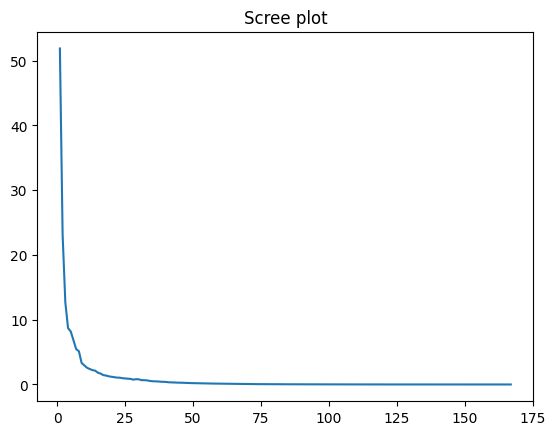

In [321]:
# Scree Plot
plt.plot(range(1,168),eigenvalues)
plt.title("Scree plot")
plt.show()

In [322]:
pca = PCA(n_components=50)
tranformed_data = pca.fit_transform(standard_df)

df_PCA = pd.DataFrame(tranformed_data)

display(df_PCA)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.769118,8.643915,2.571422,-8.205613,0.039386,-2.529457,-3.457833,-1.287508,1.306841,-0.406944,...,0.474214,0.348257,0.310826,-0.318518,0.107846,0.134899,0.069937,0.581616,-0.049207,0.231146
1,0.763795,8.523668,2.769198,-7.184717,1.010662,-1.082752,-2.439890,-3.159846,-2.042971,-0.512620,...,-0.108792,-0.535669,0.264503,0.333634,0.107921,0.378608,0.008736,-0.038407,0.349632,0.069255
2,0.229102,8.339381,2.596348,-8.241647,0.730915,-1.847807,-2.678603,-2.109662,-0.210573,1.045286,...,0.112696,0.229396,0.293168,0.340751,-0.510110,0.086497,0.188656,0.441924,0.155356,0.780029
3,1.337972,9.085953,2.769196,-7.176237,0.371706,-1.740196,-3.193988,-2.419127,-0.585826,-1.943081,...,0.347908,-0.478283,0.266375,-0.313679,0.622062,0.479401,-0.029018,0.456626,-0.066313,-0.244313
4,1.441341,8.666650,0.112710,-8.093660,2.727867,-1.801668,-0.278001,-0.227023,1.773261,0.013843,...,0.344562,0.398415,-0.299048,-0.078639,0.088464,0.349121,-0.285889,0.571959,-0.577227,0.218221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,-5.241416,-1.285284,2.017169,-2.413906,-0.397380,1.773334,4.281345,2.746530,3.932577,-0.570955,...,0.389612,-0.075402,-0.778483,-0.466776,0.073333,-0.112986,-0.642186,0.288130,0.441993,1.005530
472,-6.820326,-0.124175,-3.064510,-0.972066,3.923018,1.259577,0.055865,2.296248,-1.504215,-0.523901,...,0.668116,-0.026841,-0.352634,0.127241,-0.450003,0.040101,0.506791,0.107124,-0.022094,-0.463096
473,10.598531,-2.885852,3.125797,-0.589960,-2.394481,-2.962185,3.804843,-0.570082,3.675256,-2.385213,...,-0.439996,-0.783741,-0.214219,-0.724065,-0.388500,0.284096,-0.518943,-0.214140,0.029174,0.479258
474,-3.989194,-0.293391,-8.192366,-0.074770,0.720700,0.295841,-2.231992,1.955874,-1.196389,-0.421134,...,-0.599318,0.538365,0.495718,-1.149744,0.174459,0.506321,0.736643,0.680883,0.299006,0.054243
